<a href="https://colab.research.google.com/github/Amrutha-Macharla/Heart-Stroke-Detection/blob/main/HeartStrokeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     - 25.9 MB 665 kB/s
     |████████████████████████████████| 10.9 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 102 kB 350 kB/s 
     |████████████████████████████████| 687 kB 40.7 MB/s 
     |████████████████████████████████| 4.7 MB 63.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 812 kB 59.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=6067ac5a1465107c0697c5b0eb90841c8fc2eca753e1772aae645ec96037b01e
  Stored in directory: /tmp/pip-ephem-wheel-cache-qgn3m5aw/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5bb5e0d5eb6e8c883acf562ebd6dd7f4a0f137aaea7d32e2e18715d04d54ae48
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [ ]:
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.figure_factory as ff
import math

# Importing library for balancing the data.
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Importing libraries for splitting and scaling the data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

#----------------for splitting data-----------------
from sklearn.model_selection import train_test_split
#----------------for Standarlizing the data-----------------
from sklearn.preprocessing import StandardScaler
#----------------for MLP-----------------
from sklearn.neural_network import MLPClassifier
#----------------for accuracy-----------------
from sklearn.metrics import confusion_matrix, accuracy_score



TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
HeartStrokeData=pd.read_csv("/content/drive/MyDrive/SoftComputing/heartstroke.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/SoftComputing/heartstroke.csv")

In [ ]:
profile=ProfileReport(HeartStrokeData,title='Strode Prediction Profile Report',html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ***Basics***

In [ ]:
HeartStrokeData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data=HeartStrokeData;
data.shape

(5110, 12)

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [ ]:
#checking Null Values
data.isnull()
#got false

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#count the null values in the data set
data.isna().sum()
#after observing data containg Null values we can decide that EventSubType has so many rows containing NULL values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.describe(include=np.object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
data.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

**Applying Condition and checking Value Counts**

In [ ]:
data.loc[data["smoking_status"] == "never smoked", "id"].value_counts()

24018    1
46454    1
50522    1
24381    1
54620    1
        ..
45801    1
68330    1
29419    1
45805    1
69723    1
Name: id, Length: 1892, dtype: int64

In [ ]:
data.loc[data["smoking_status"] == "never smoked", "id"].value_counts().min()

1

In [ ]:
data.loc[data["smoking_status"] == "never smoked", "id"].value_counts().max()

1

In [ ]:
data.loc[data["smoking_status"] == "never smoked", "id"].value_counts().agg(("min", "max"))

min    1
max    1
Name: id, dtype: int64

In [ ]:
#@title Lacation in the dataset { form-width: "30%" }
data.iloc[1]
data.loc[1]

In [ ]:
#data["age"].notnull()
#here we can assign the values also when it becomes true
#datachanged=data[data["age"].notnull()]
#smokeddata = data[data["smoking_status"].str.endswith("smoked")]
#smokeddata.shape

### **Here we can use the and operation to check the condition and comparision**

In [ ]:
data[(data["age"] == 61) & (data["smoking_status"]=="never smoked")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
671,967,Male,61.0,0,1,Yes,Private,Urban,88.27,NaN,never smoked,0
829,26999,Male,61.0,1,1,Yes,Govt_job,Rural,86.06,34.8,never smoked,0
978,37349,Female,61.0,0,0,Yes,Private,Rural,123.36,33.4,never smoked,0
1311,27966,Female,61.0,0,0,Yes,Private,Urban,74.82,30.6,never smoked,0
1543,49023,Male,61.0,1,0,Yes,Self-employed,Rural,102.54,40.5,never smoked,0
1594,35584,Male,61.0,0,0,Yes,Private,Rural,89.75,25.4,never smoked,0
1722,26826,Female,61.0,0,0,Yes,Self-employed,Urban,73.36,16.1,never smoked,0
1873,48069,Female,61.0,0,0,Yes,Private,Rural,194.53,45.0,never smoked,0
1955,71182,Female,61.0,1,0,Yes,Govt_job,Urban,153.38,38.8,never smoked,0


In [ ]:
data["age"].sum()
data["age"].max()

82.0

***Grouping the coulums***



In [ ]:
data[(data["age"] == 61) & (data["smoking_status"]=="never smoked")].groupby(["id", "age","work_type"])["bmi","stroke"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,,bmi,stroke
id,age,work_type,,
967,61.0,Private,0,1
3428,61.0,Self-employed,1,1
11861,61.0,Self-employed,1,1
13172,61.0,Self-employed,1,1
16980,61.0,Private,1,1
20185,61.0,Self-employed,1,1
22865,61.0,Private,0,1
25811,61.0,Private,1,1
26826,61.0,Self-employed,1,1


***define new columns based on the existing ones***

In [ ]:
data["isnull"] = data["age"].notnull()

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,isnull
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,True
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,True
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,True
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,True
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,True


In [ ]:
data["isnull"].value_counts()

True    5110
Name: isnull, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  isnull             5110 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 484.2+ KB


# ***Preprocessing***

In [ ]:
HeartStrokeData

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,isnull
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,True
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,True
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,True
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,True
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,True
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,True
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,True


In [ ]:
#@title ID is not necessary so it is dropping  { form-width: "20%" }
data.drop(["id"], axis=1, inplace = True);

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,isnull
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,True
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,True
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,True
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,True


In [ ]:
#data["bmi"].isna().sum()

201

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



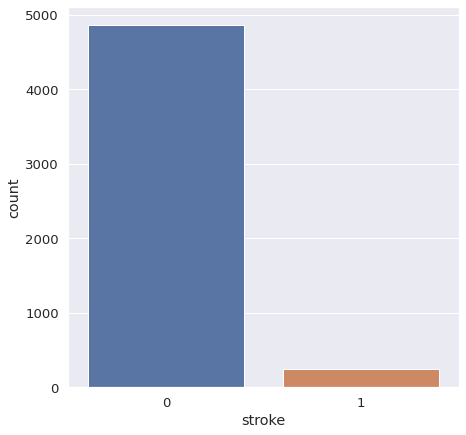

In [ ]:
sns.countplot(data['stroke'],label="Count")

## ***With out dropping Null values(Filling Missing Values)***

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/SoftComputing/heartstroke.csv")

In [ ]:
#data1['ever_married'] = data1['ever_married'].astype('object')
#data1['Residence_type'] = data1['Residence_type'].astype('object')
#data1['smoking_status'] = data1['smoking_status'].astype('object')

In [ ]:
#@title Finding Missing Values  from data
data1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#@title ID is not necessary so it is dropping  { form-width: "20%" }
data1.drop(["id"], axis=1, inplace = True);

In [ ]:
#@title Applying mean of that column and replacing with Nan values  { form-width: "40%" }
#### data1["bmi"].replace(np.NaN,data1["bmi"].mean(),inplace=True)

In [ ]:
#@title 3.9% of values are missing in bmi column. Since it is less than 5%. We can impute those values based on the age factor { form-width: "40%" }
(data1.isnull().sum()/len(data1))*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
data1

In [ ]:
#@title Here we are finding mean of BMI for there respective age ranges
bmi_less_than_age_15 = np.mean(data1[data1['age']<=15]['bmi'])
bmi_age_15_to_50 = np.mean(data1[(data1['age']>15) & (data1['age']<=50)]['bmi'])
bmi_age_greater_50 = np.mean(data1[data1['age']>50]['bmi'])

def bmi_imputation(data):
    for index,row in data.iterrows():
        if math.isnan(row['bmi']):
            if row['age'] <=15:
                data.loc[index,'bmi'] = bmi_less_than_age_15
            elif (row['age'] >15) & (row['age']<=50):
                data.loc[index,'bmi'] = bmi_age_15_to_50
            elif row['age'] >50:
                data.loc[index,'bmi'] = bmi_age_greater_50
    return data

In [ ]:
data1.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
data1 = bmi_imputation(data1)
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data1['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

## ***Finding Outliers***

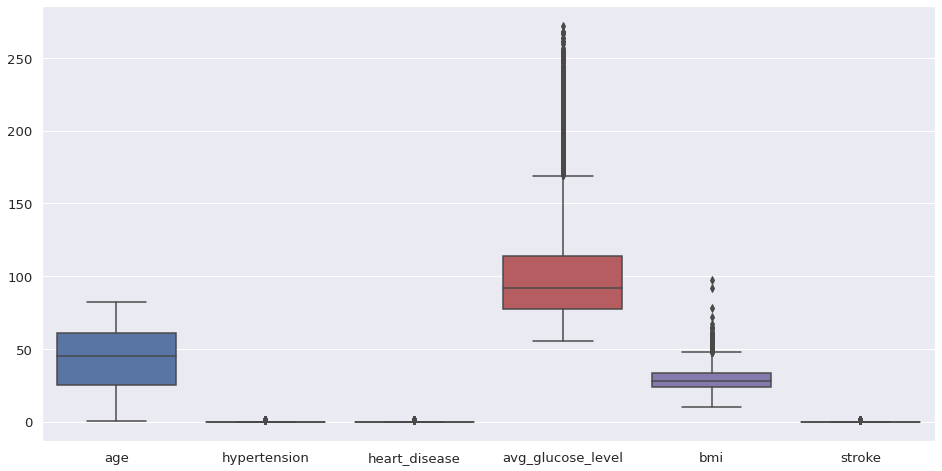

In [ ]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=data1,ax=ax)

In [ ]:
data1['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
data1[data1['avg_glucose_level']>114].shape

(1282, 11)

***Observation***


*   In avg_glucose_level there are so many outliers max value is 271 and 75% data is above 114.09 only. even though if we want to remove or change the outliers then almost 1282 values have to change.so i am not changing anything regarding this  

*   BMi also for some one it will be high and for someone it will be row

*   Age is in correct there is no outlies





## ***Normalize the data***

In [ ]:
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.668094,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,30.668094,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0



###  ***Recoding the data***


***Rescaling the dataset columns***

*   **Gender:**Male=1,Female=2
*   **Married:**Yes=1,No=0
*   **Resident:**Urban=1,Rural=2
*   **Smoking:**Unknown=0,never smoked=1,formerly smoked=2,smokes=3
*   **Work Type:**never_worked=0,private=1,self_employed=2,children=3,Govt_job=4







In [ ]:
#@title
Gender={'Male':1,'Female':2,'Other':3}
data1["gender"].replace(Gender,inplace=True)
Married={'Yes':1,'No':0}
data1["ever_married"].replace(Married,inplace=True)
Resident = {'Urban':1,'Rural':2}
data1["Residence_type"].replace(Resident,inplace=True)
Smoking = {'Unknown':0,'never smoked':1,'formerly smoked':2,'smokes':3}
data1["smoking_status"].replace(Smoking,inplace=True)
WorkType = {'Never_worked':0,'Private':1,'Self-employed':2,'children':3,'Govt_job':4}
data1["work_type"].replace(WorkType,inplace=True)


In [ ]:
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,2,1
1,2,61.0,0,0,1,2,2,202.21,30.668094,1,1
2,1,80.0,0,1,1,1,2,105.92,32.500000,1,1
3,2,49.0,0,0,1,1,1,171.23,34.400000,3,1
4,2,79.0,1,0,1,2,2,174.12,24.000000,1,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


 ***Observation:***


*   Now in the data set we have every thing in number either int or float
*   Every thing is normalized now




In [ ]:
profile=ProfileReport(data1,title='Strode Prediction Profile Report',html={'style':{'full_width':True}})
profile

## ***Visualization of data with respect to Stroke***

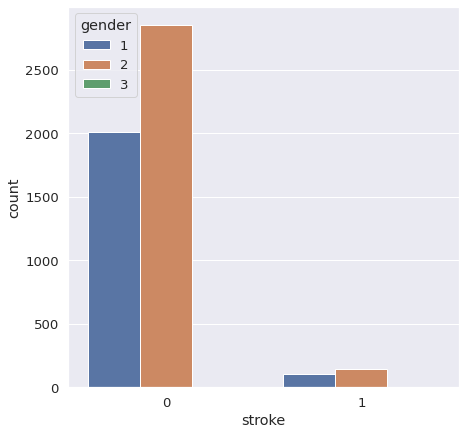

In [ ]:
#@title
sns.countplot(x="stroke",data=data1,hue='gender')

***Observation***
1.   We could notice that the dataset is imbalanced
2.   Among those who have experienced stroke, females are higher


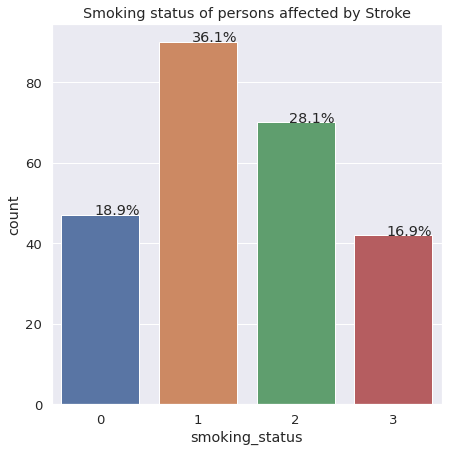

In [ ]:
ax=sns.countplot(x='smoking_status',data=data1[data1['stroke']==1])
plt.title("Smoking status of persons affected by Stroke")
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

***Observation:***


*   **Around 45% of the people who are affected by strokes, they have either formaly smoked or smokes. So, Smoking might also be a factor which could cause strokes**
*   **Smoking:**Unknown=0,never smoked=1,formerly smoked=2,smokes=3



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of age of people affected by stroke')

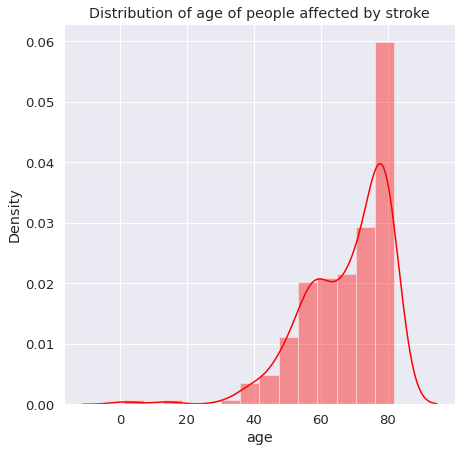

In [ ]:
# sns.displot(data=df1, x="age", col="stroke", kind="kde")
sns.distplot(data1[data1['stroke']==1]['age'],color='red')
plt.title("Distribution of age of people affected by stroke")

***Observation:***


*   Most of them who got stroke are older people aged above 60. Age factor could be a potential threat for stroke. Older people should monitor their condition with atmost care to prevent stroke.
*   Younger generation might be less susceptible to stroke
*   May be this will be the more require column to predict the stroke



Text(0.5, 1.0, 'Work type of people Who affected by Stroke')

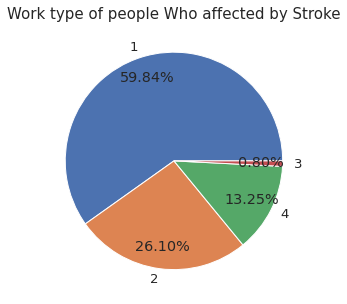

In [ ]:
work_type = data1[data1['stroke'] == 1]['work_type'] #here taking the data of only who got stroke
values = work_type.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(5,5))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Work type of people Who affected by Stroke', fontsize=15)

***Observation:***


*   59.84% of the people who are affected by stroke belongs to private work type. Very less percent of around 13% of the people belongs to Govt Job. So, Based on the analysis we could say that the candiates working in private jobs might experience high stress or pressure.
*   **Work Type:**never_worked=0,private=1,self_employed=2,children=3,Govt_job=4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of bmi of people Who affected by stroke')

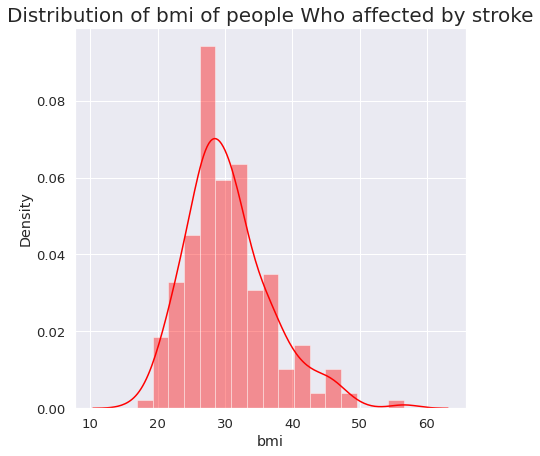

In [ ]:
sns.distplot(data1[data1['stroke']==1]['bmi'],color='red')
plt.title("Distribution of bmi of people Who affected by stroke",fontsize=20)

***Observation:***


*   Average BMI value of people affected by stroke is 30. BMI value of greater than 25 is considered to be obese. On a average we could say that people who are affected by stroke are obese. From the graph we could notice that few have bmi of greater than 45, they are considered to be morbidly obese



In [ ]:
sns.boxplot(x="stroke",y="avg_glucose_level",data=data1)
plt.title("Average glucose level",fontsize=20)

***Observation:***


*   People who are affected by Stroke have higher glucose level of above 100 on average. A fasting blood sugar level of 100-125 is considered to be prediabetic.



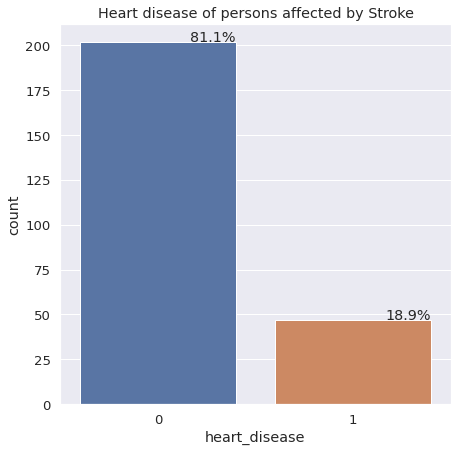

In [ ]:
ax=sns.countplot(x='heart_disease',data=data1[data1['stroke']==1])
plt.title("Heart disease of persons affected by Stroke",fontsize=20)
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

***Observation:***


*   81 percent of the people are who are affected by stroke dont have a heart disease. Heart disease might not be a significant reason for stroke



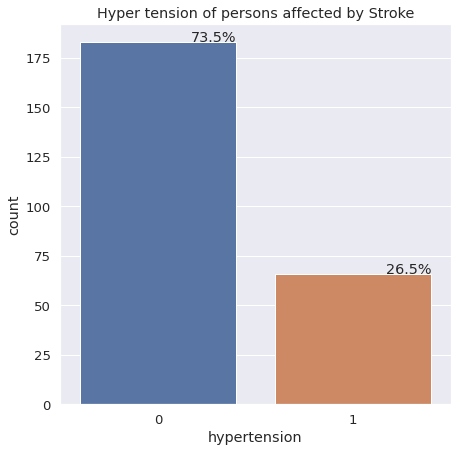

In [ ]:
ax=sns.countplot(x='hypertension',data=data1[data1['stroke']==1])
plt.title("Hyper tension of persons affected by Stroke",fontsize=20)
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()
# df1.head()

***Observation:***

*   73% of the people who are affected by Stroke are not suffering from Hypertension. So, Even Hypertension might not be a significant reason for stroke




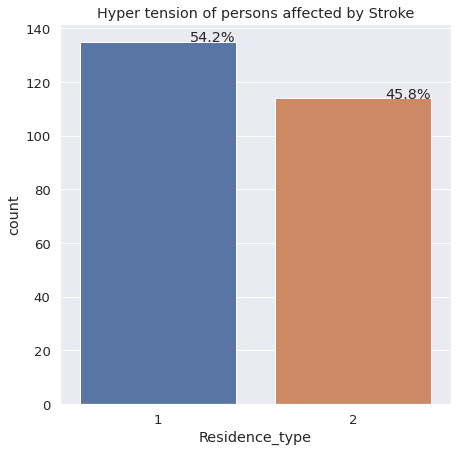

In [ ]:
ax=sns.countplot(x='Residence_type',data=data1[data1['stroke']==1])
plt.title("Residence of persons affected by Stroke",fontsize=20)
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

***Observation:***


*   Around 54% of the people affected by Stroke are from Urban area. A possible reason could be people in urban areas might experience health issues due to pollution and other factors such as eating habits, etc



In [ ]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.013690,0.001403,0.001092,0.000704,0.012155,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.679125,-0.014180,0.238171,0.336187,0.307009,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.164243,0.007913,0.174474,0.165121,0.106639,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.114644,-0.003092,0.161857,0.044289,0.085211,0.134914
ever_married,0.013690,0.679125,0.164243,0.114644,1.000000,-0.006261,0.155068,0.342585,0.284833,0.108340
Residence_type,0.001403,-0.014180,0.007913,-0.003092,-0.006261,1.000000,0.004946,-0.000179,-0.022853,-0.015458
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,0.155068,0.004946,1.000000,0.171879,0.079825,0.131945
bmi,0.000704,0.336187,0.165121,0.044289,0.342585,-0.000179,0.171879,1.000000,0.221804,0.045103
smoking_status,0.012155,0.307009,0.106639,0.085211,0.284833,-0.022853,0.079825,0.221804,1.000000,0.054914
stroke,0.006388,0.245257,0.127904,0.134914,0.108340,-0.015458,0.131945,0.045103,0.054914,1.000000


***Observation:***


*   Age is almost slightly positive correlated with other features such as hyper tension, heart disease, glucose level, bmi and even stroke. So, As the age increases, the health related issues also increases in general. Here, Age could be a good indicator for predicting whether a person will be affected by Stroke or not



### Removing Unnecessary colums for better prediction

In [ ]:
#Dropping id column because of high cardinality
data1.drop(['id'],inplace=True,axis=1)

In [ ]:
dataf2=pd.get_dummies(data1,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)
dataf2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_2,gender_Other,ever_married_1,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_2,smoking_status_1,smoking_status_2,smoking_status_3
0,67.0,0,1,228.69,36.600000,1,0,0,1,0,1,0,0,0,0,1,0
1,61.0,0,0,202.21,30.668094,1,1,0,1,0,0,1,0,1,1,0,0
2,80.0,0,1,105.92,32.500000,1,0,0,1,0,1,0,0,1,1,0,0
3,49.0,0,0,171.23,34.400000,1,1,0,1,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,1,0,0,1,0,1,1,0,0


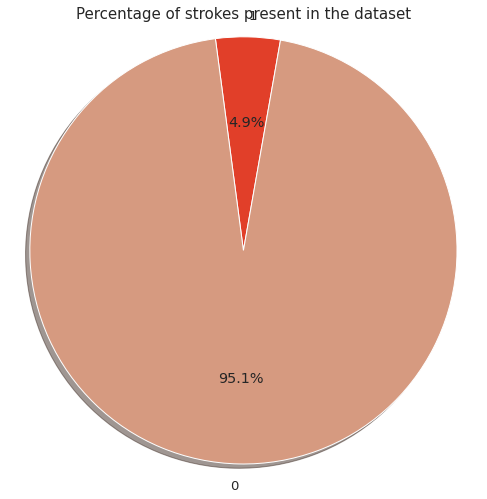

In [ ]:
#@title Only 4.9% of people are affected by stroke so the data available to us is imbalanced and we need to balance it before giving to our machine learning algorithms { vertical-output: true, form-width: "40%" }
stroke=Counter(data1['stroke'])
classes=[]
count=[]   #list to store no of laels of each class
for i in stroke.keys():
    classes.append(i)
    count.append(stroke[i])
colors = ["#E13F29", "#D69A80"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of strokes present in the dataset", fontsize=15)
plt.show()

In [ ]:
data1.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

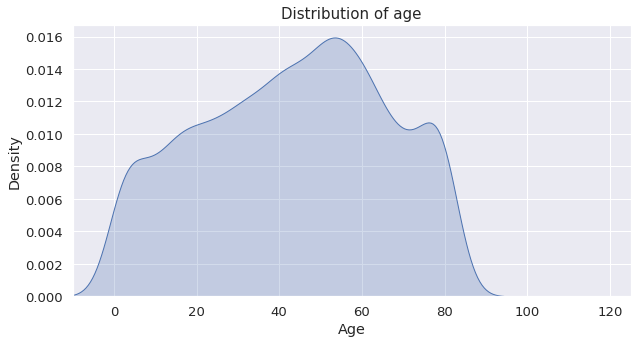

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(-10,125)
plt.xlabel('Age')
plt.ylabel('Density')
sns.kdeplot(data1['age'],shade=True)
plt.title('Distribution of age', fontsize=15)
plt.show()

In [ ]:
stroke = data1[data1['stroke']==1]['age'].fillna(0.0).astype(float)
stroke_no = data1[data1['stroke']==0]['age'].fillna(0.0).astype(float)
fig = ff.create_distplot([stroke, stroke_no], ['Stroke','No Stroke'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#221F1F','#E50914'])
fig.update_layout(
    title="Stroke distibution over age",
    xaxis_title="Age",
)
fig.show()

## ***Dropping Null Values(not filling)***

In [ ]:
# Drop all data points with missing values
data = data.dropna()

In [ ]:
data["bmi"].isna().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [ ]:
# Label encode 'gender':
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes

# ***APPLYING NUERAL NETWORK ALGORITHMS***

### **Splitting the data for testing and training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.preprocessing import LabelEncoder

In [ ]:
data1.shape

(5110, 11)

In [ ]:
data1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,2,1
1,2,61.0,0,0,1,2,2,202.21,30.668094,1,1
2,1,80.0,0,1,1,1,2,105.92,32.500000,1,1
3,2,49.0,0,0,1,1,1,171.23,34.400000,3,1
4,2,79.0,1,0,1,2,2,174.12,24.000000,1,1


In [ ]:
X_data1 = data1.iloc[:,0:10].values
Y_data1 = data1.iloc[:, -1].values

In [ ]:
X_data1.shape

(5110, 10)

In [ ]:
Y_data1

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data1, Y_data1, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### **Appling MLPClassifier(MULTI-LAYER PERCEPTRON)**

In [ ]:
mlp = MLPClassifier(max_iter=1000, activation='relu')
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[960   8]
 [ 51   3]]


0.9422700587084148

### **Applying ANN**

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 0.1290 - accuracy: 0.9568
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9514
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9551
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9564
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9589
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9548
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.9492
Epoch 8/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9539
Epoch 9/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.9573
Epoch 10/100
128/128 [==============================] - 0s 1ms/step - loss: 0.1252 - accura

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[966   2]
 [ 54   0]]


0.9452054794520548

### **Applying Perceptron Single Layer**